In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/ICA/Functions')
import StatisticalAnalysis, amari
import sys
sys.path.insert(0, '/home/micael/MyWorkspace/PtRelAnalysis/functions')
import HistogramFunctions,FigureFunctions,FitFunctions,FunctionsTypes

from scipy import signal
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.metrics import mean_squared_error

import rootnotes
import root_numpy
import ROOT
import StatisticalAnalysis
#from ROOT import TCanvas, TFile, TPaveText
from scipy.stats import chisquare,kurtosistest,normaltest

source_path = '/home/micael/MyWorkspace/ICA/Mixture_keys'
# local to save all results and images 
save_images = '/home/micael/Documents/Mestrado/ICA/trabalho_parte2'
obs_path = '/home/micael/MyWorkspace/ICA/'

# First Mixture 

Fontes:

$s_0$ = Sinusoidal

$s_1$ = Onda quadrada

$s_2$ = Dente de Serra


In [2]:
sources = np.loadtxt(source_path+'/'+'NinthSource100Stats.txt')
matrix_A = np.loadtxt(source_path+'/'+'NinthMixMatrix.txt')

x = np.loadtxt(obs_path+'NinthMixture100Stats.txt')
x.shape,sources.shape

information_algorithm_matrix = np.zeros([5,3])
information_algorithm_matrix.shape

(5, 3)

In [3]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.60054163,  0.51288079],
       [ 0.60054163,  1.        ,  0.33867115],
       [ 0.51288079,  0.33867115,  1.        ]])

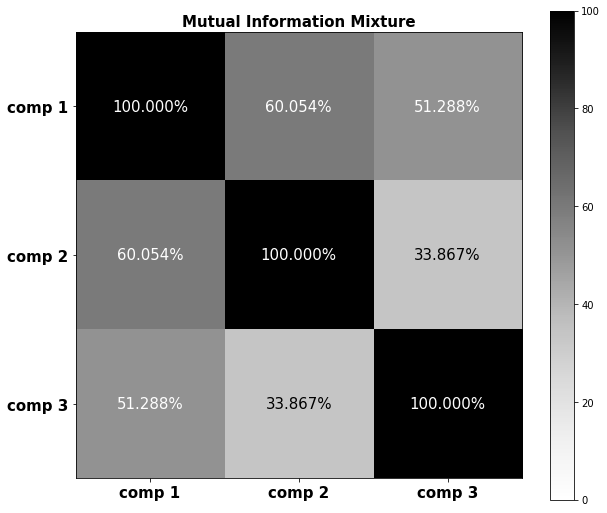

In [4]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run9_mix_MI_100',save=True)

In [5]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.02034245,  0.05454298],
       [ 0.02034245,  1.        ,  0.01340497],
       [ 0.05454298,  0.01340497,  1.        ]])

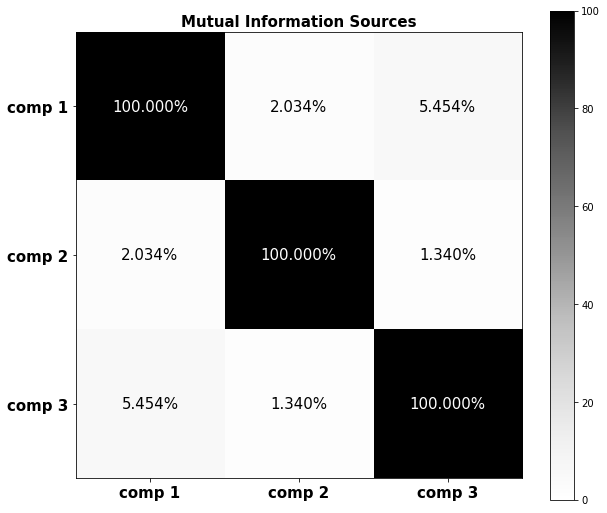

In [6]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run9_sources_MI_100',save=True)

In [7]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
convergence_time = round(current_time-init_time,3)
numero_interacao = fit.n_iter_

number of interations: 3
Time to converges the FastICA: 0.005 seconds


In [8]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.01205379,  0.06278457],
       [ 0.01205379,  1.        ,  0.02065349],
       [ 0.06278457,  0.02065349,  1.        ]])

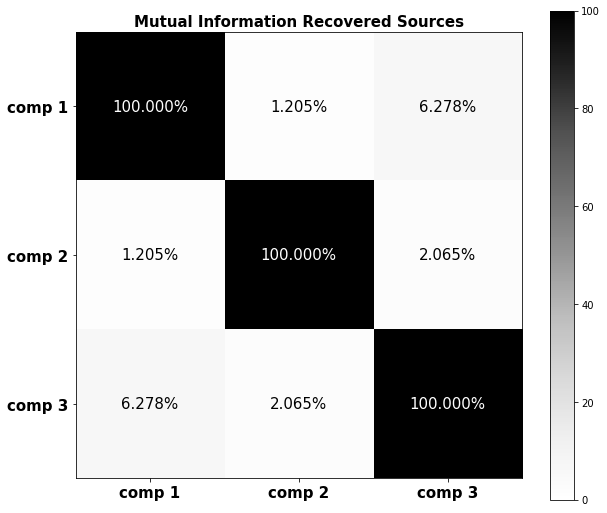

In [9]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run9_reco_MI_100',save=True)

In [10]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.05659549,  0.02034245,  0.84974152],
       [ 0.01205379,  1.        ,  0.02065349],
       [ 0.92565942,  0.01340497,  0.06105392]])

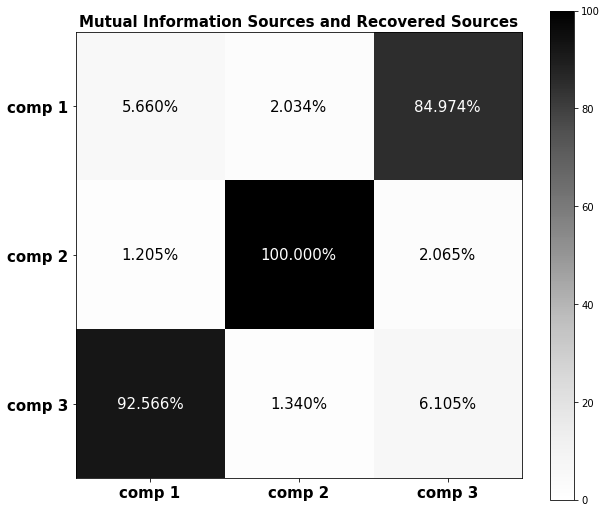

In [11]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run9_sourcesreco_MI_100',save=True)

In [12]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.84974152,  0.02034245,  0.05659549],
       [ 0.02065349,  1.        ,  0.01205379],
       [ 0.06105392,  0.01340497,  0.92565942]])

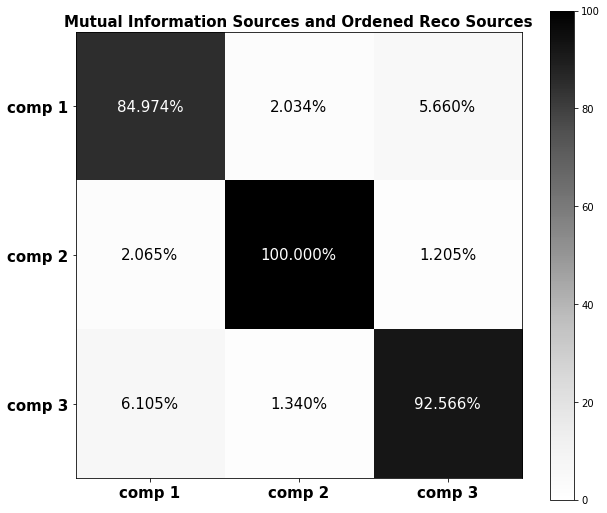

In [13]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run9_sourcesreco_ordened_MI_100',save=True)

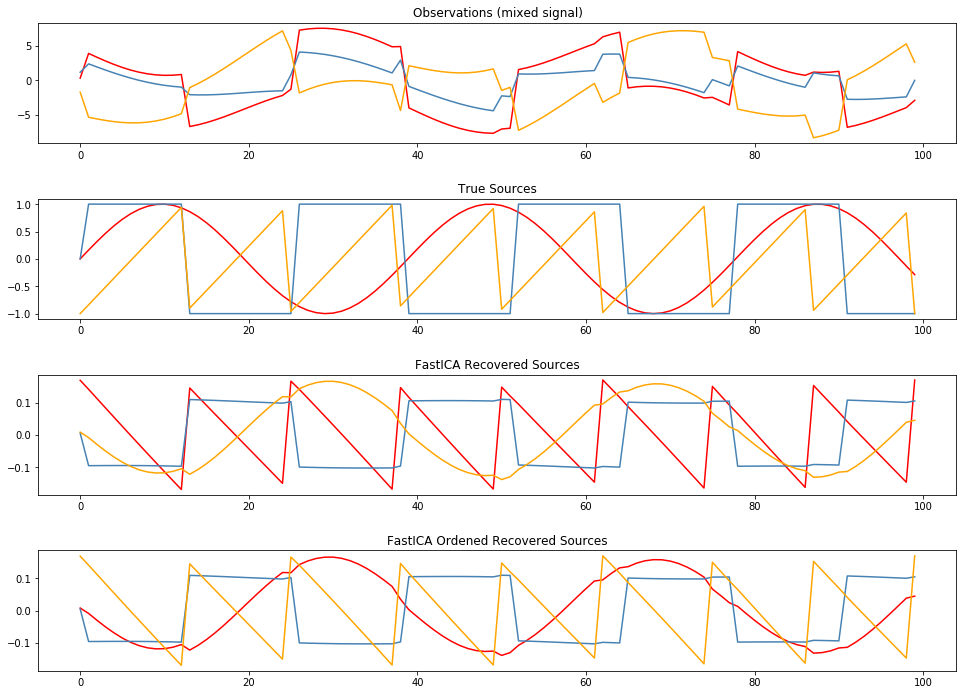

In [14]:
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,sources,recovered_sources,ordened_recovered_sources]#, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
        'FastICA Recovered Sources',
        'FastICA Ordened Recovered Sources']
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.savefig(save_images+'/'+'run9_time_series_100.pdf')
plt.show()

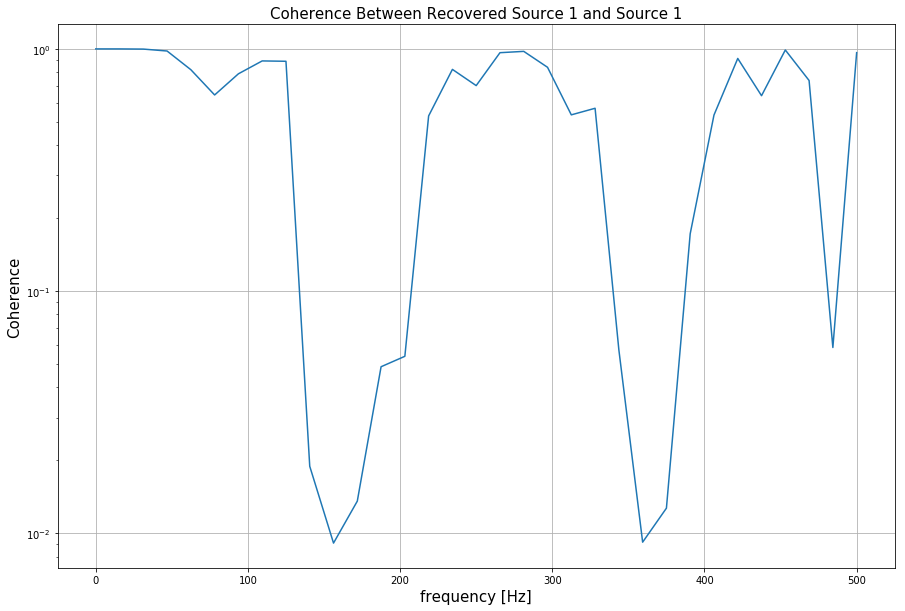

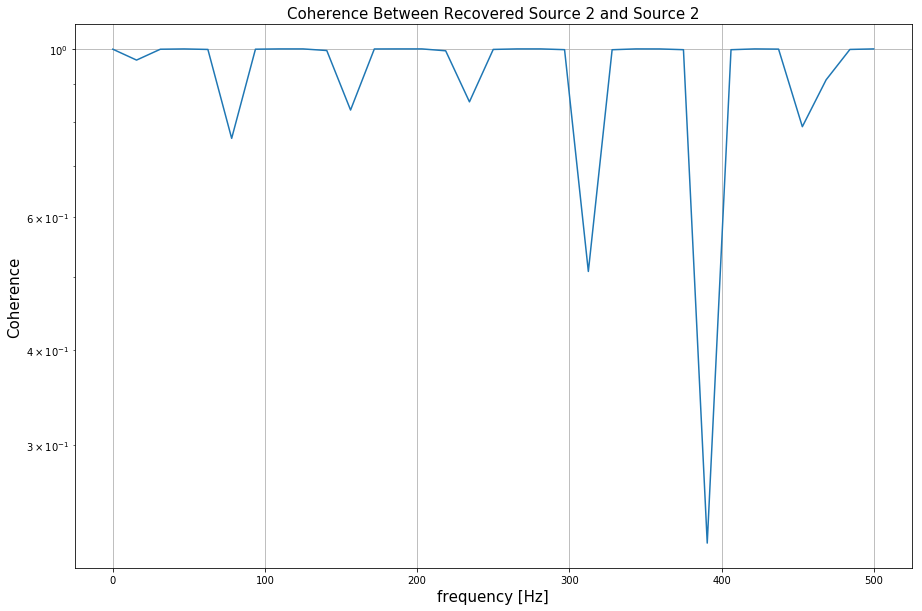

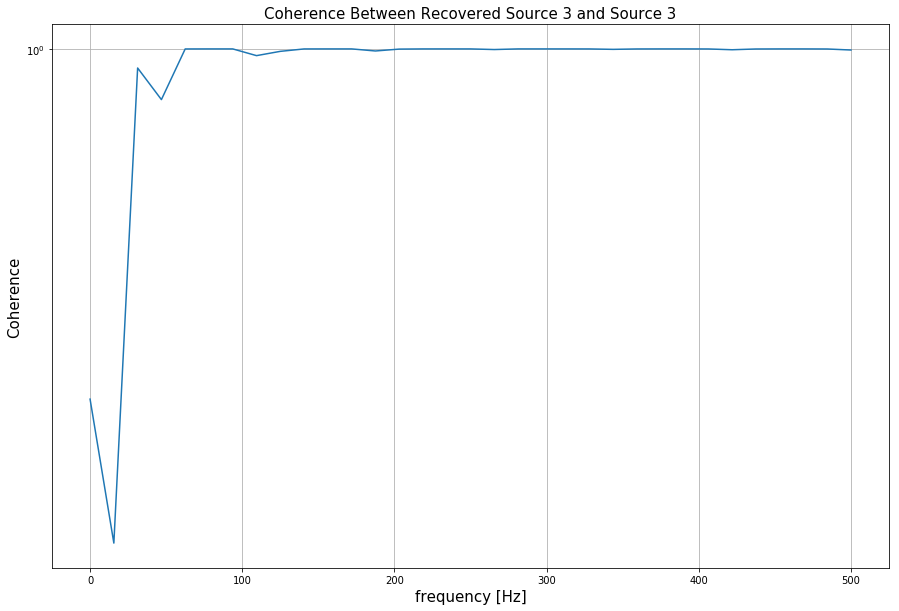

In [16]:

fs = 10e2
for i in range(ordened_recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    f, Cxy = signal.coherence(ordened_recovered_sources[i,:], sources[i,:],fs,nperseg=64)
    plt.semilogy(f, Cxy)
    plt.title('Coherence Between Recovered Source '+str(i+1)+' and Source '+str(i+1),fontsize =15)
    plt.xlabel('frequency [Hz]',fontsize =15)
    plt.ylabel('Coherence',fontsize =15)
    plt.grid()
    plt.savefig(save_images+'/'+'run9_time_series_100_coherence'+str(i+1)+'.pdf')
    plt.show()

In [35]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [36]:
SKL_div,JS_div

(array([[  1.69727889e-01,   2.02703559e-01,   1.66936577e-01],
        [  4.43465589e-01,   8.38964896e-17,   6.48705798e-01],
        [  1.61072084e-01,   2.44614625e-01,   4.35108714e-02]]),
 array([[  9.24711024e-02,   3.40754157e-01,   1.79458513e-01],
        [  1.97804754e-01,   7.08780688e-17,   2.06905361e-01],
        [  1.46923086e-01,   5.02569888e-01,   2.62226186e-02]]))

In [37]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &             1 &         2 \\
\midrule
0 &  0.092471 &  3.407542e-01 &  0.179459 \\
1 &  0.197805 &  7.087807e-17 &  0.206905 \\
2 &  0.146923 &  5.025699e-01 &  0.026223 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrr}
\toprule
{} &         0 &             1 &         2 \\
\midrule
0 &  0.169728 &  2.027036e-01 &  0.166937 \\
1 &  0.443466 &  8.389649e-17 &  0.648706 \\
2 &  0.161072 &  2.446146e-01 &  0.043511 \\
\bottomrule
\end{tabular}



In [17]:
information_algorithm_matrix[0,0] = numero_interacao
information_algorithm_matrix[1,0] = convergence_time
information_algorithm_matrix[2,0] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,0] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,0] = mean_squared_error(sources,ordened_recovered_sources)
information_algorithm_matrix

array([[ 3.        ,  0.        ,  0.        ],
       [ 0.005     ,  0.        ,  0.        ],
       [ 4.97880639,  0.        ,  0.        ],
       [ 3.18786783,  0.        ,  0.        ],
       [ 0.76646895,  0.        ,  0.        ]])

# Using 1000 stats

In [18]:
sources = np.loadtxt(source_path+'/'+'NinthSource1000Stats.txt')

x = np.loadtxt(obs_path+'NinthMixture1000Stats.txt')


In [19]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.56701883,  0.54338468],
       [ 0.56701883,  1.        ,  0.38405194],
       [ 0.54338468,  0.38405194,  1.        ]])

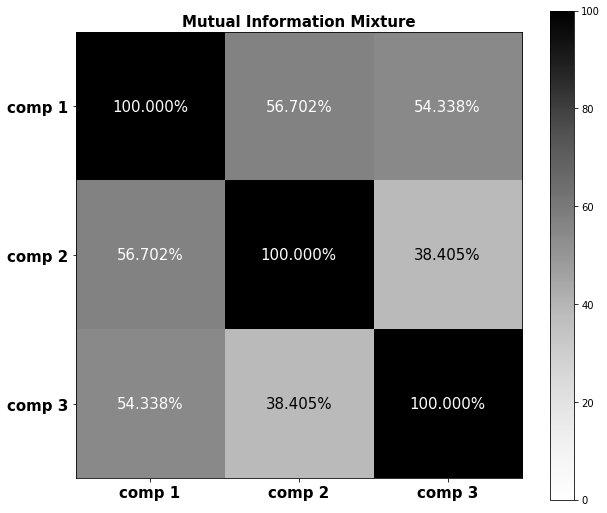

In [20]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run9_mix_MI_1k',save=True)

In [21]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.0074836 ,  0.15444681],
       [ 0.0074836 ,  1.        ,  0.00286567],
       [ 0.15444681,  0.00286567,  1.        ]])

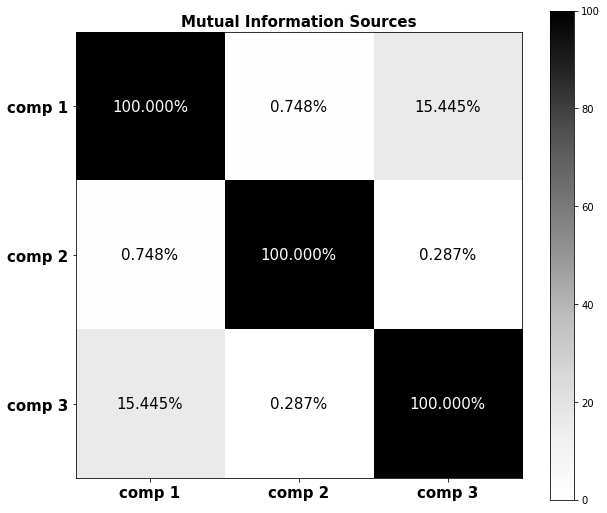

In [22]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run9_sources_MI_1k',save=True)

In [23]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 5
Time to converges the FastICA: 0.009 seconds


In [24]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.00319873,  0.16647432],
       [ 0.00319873,  1.        ,  0.0072525 ],
       [ 0.16647432,  0.0072525 ,  1.        ]])

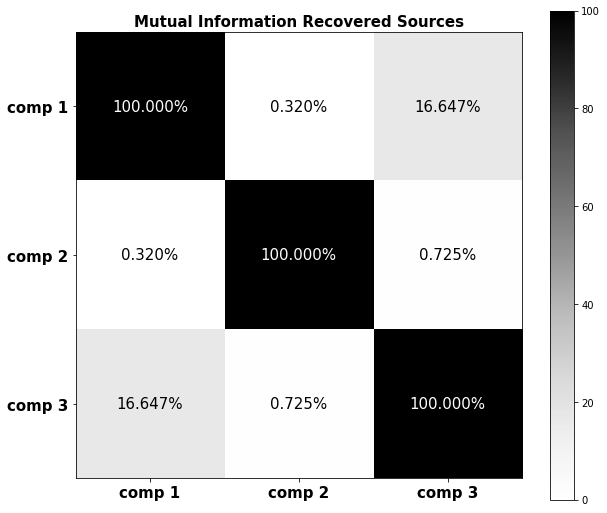

In [25]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run9_reco_MI_1k',save=True)

In [26]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.15111465,  0.00863302,  0.77387426],
       [ 0.00287123,  1.        ,  0.00394567],
       [ 0.75347989,  0.00343336,  0.16984906]])

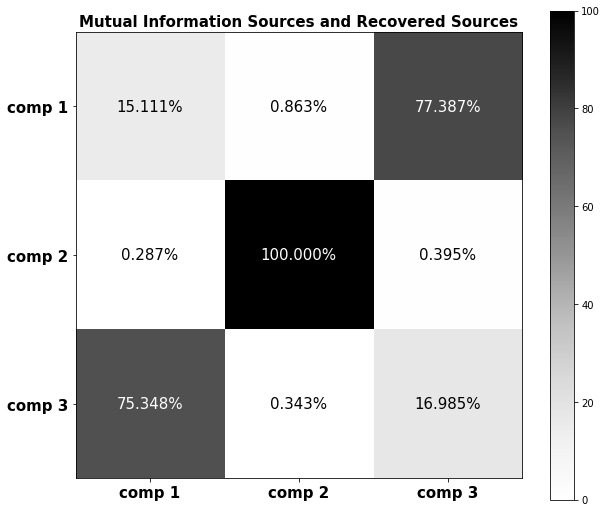

In [27]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run9_sourcesreco_MI_1k',save=True)

In [28]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[2,:]
ordened_recovered_sources[1,:] = recovered_sources[1,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.77387426,  0.00863302,  0.15111465],
       [ 0.00394567,  1.        ,  0.00287123],
       [ 0.16984906,  0.00343336,  0.75347989]])

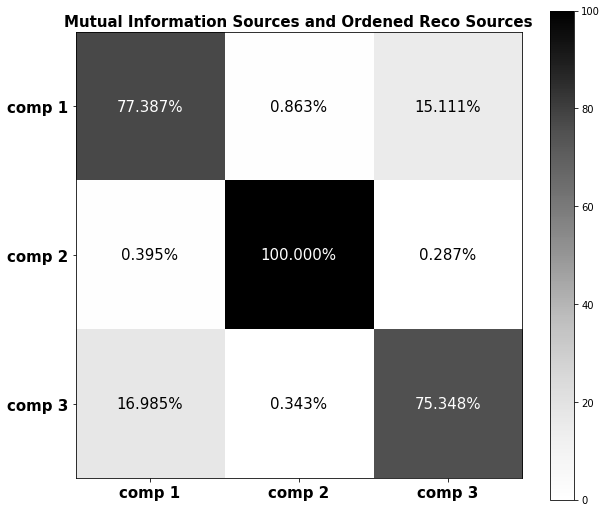

In [29]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run9_sourcesreco_ordened_MI_1k',save=True)

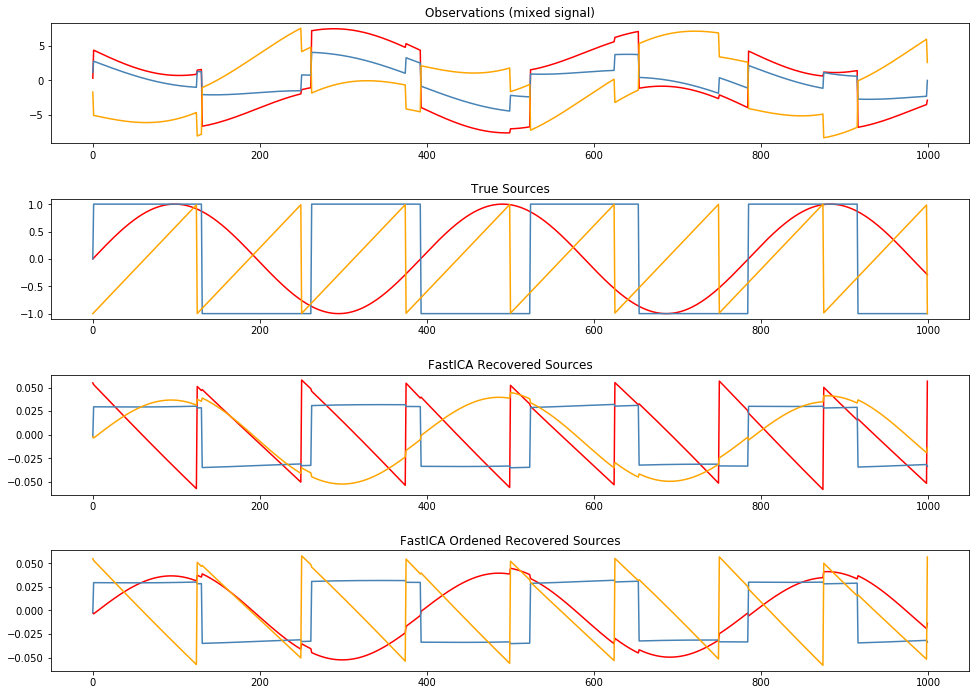

In [30]:
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,sources,recovered_sources,ordened_recovered_sources]#, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
        'FastICA Recovered Sources',
        'FastICA Ordened Recovered Sources']
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.savefig(save_images+'/'+'run9_time_series_1k.pdf')
plt.show()

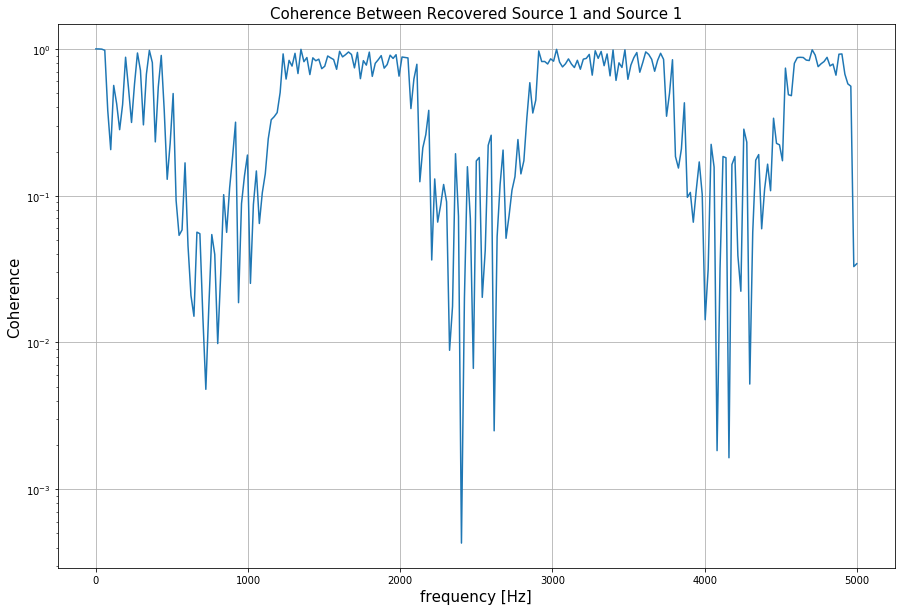

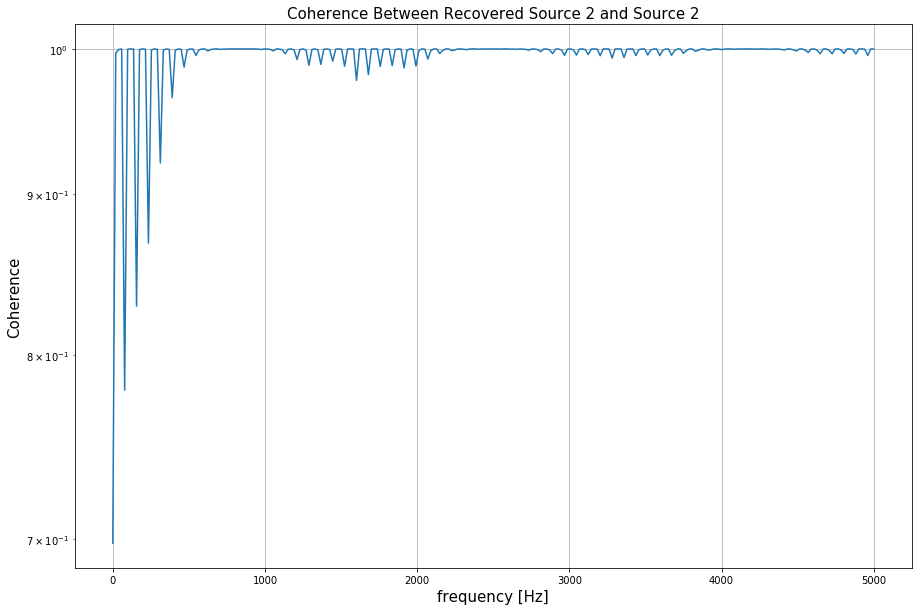

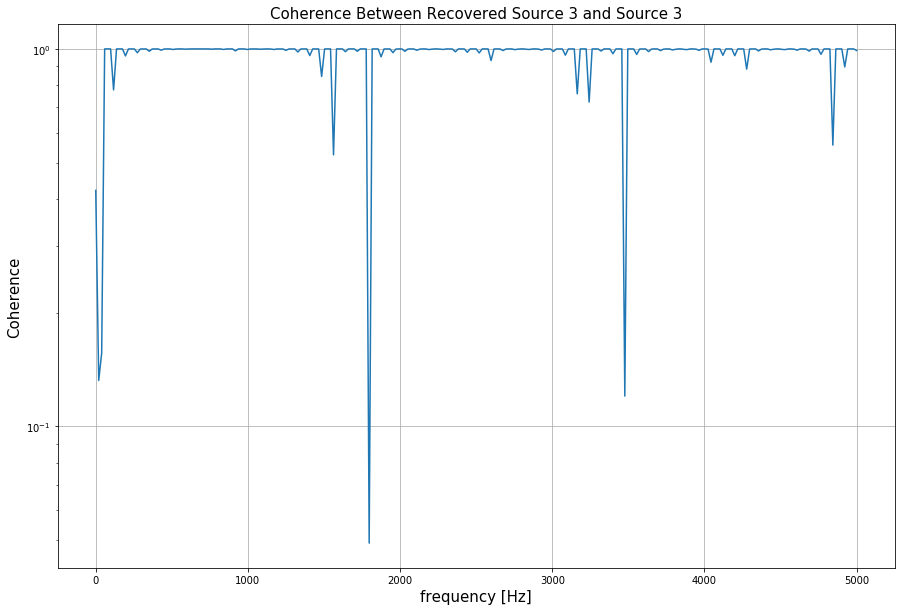

In [32]:
fs = 10e3
for i in range(ordened_recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    f, Cxy = signal.coherence(ordened_recovered_sources[i,:], sources[i,:],fs,nperseg=512)
    plt.semilogy(f, Cxy)
    plt.title('Coherence Between Recovered Source '+str(i+1)+' and Source '+str(i+1),fontsize =15)
    plt.xlabel('frequency [Hz]',fontsize =15)
    plt.ylabel('Coherence',fontsize =15)
    plt.grid()
    plt.savefig(save_images+'/'+'run9_time_series_1k_coherence'+str(i+1)+'.pdf')
    plt.show()

In [36]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [37]:
SKL_div,JS_div

(array([[ 0.08672669,  0.44695016,  0.52155263,  0.61975244],
        [ 0.34828704,  0.03046541,  0.40533233,  0.98866279],
        [ 0.49751592,  0.35819161,  0.70318347,  1.39561516],
        [ 0.50305631,  0.88615539,  0.76461286,  0.63079583]]),
 array([[ 0.04481582,  0.19469123,  0.28876617,  0.27381896],
        [ 0.21504701,  0.01595555,  0.10350902,  0.45494279],
        [ 0.24252003,  0.32486258,  0.34947448,  0.45655044],
        [ 0.30404853,  0.60091241,  0.71530756,  0.30881577]]))

In [38]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.044816 &  0.194691 &  0.288766 &  0.273819 \\
1 &  0.215047 &  0.015956 &  0.103509 &  0.454943 \\
2 &  0.242520 &  0.324863 &  0.349474 &  0.456550 \\
3 &  0.304049 &  0.600912 &  0.715308 &  0.308816 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.086727 &  0.446950 &  0.521553 &  0.619752 \\
1 &  0.348287 &  0.030465 &  0.405332 &  0.988663 \\
2 &  0.497516 &  0.358192 &  0.703183 &  1.395615 \\
3 &  0.503056 &  0.886155 &  0.764613 &  0.630796 \\
\bottomrule
\end{tabular}



In [33]:
information_algorithm_matrix[0,1] = numero_interacao
information_algorithm_matrix[1,1] = convergence_time
information_algorithm_matrix[2,1] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,1] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,1] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[ 3.        ,  5.        ,  0.        ],
       [ 0.005     ,  0.009     ,  0.        ],
       [ 4.97880639,  2.62405217,  0.        ],
       [ 3.18786783,  1.1393265 ,  0.        ],
       [ 0.76646895,  0.58960387,  0.        ]])

# Using 100K stats

In [34]:
sources = np.loadtxt(source_path+'/'+'NinthSource100000Stats.txt')

x = np.loadtxt(obs_path+'NinthMixture100000Stats.txt')


In [35]:
MI_x = StatisticalAnalysis.create_mutual_info_matrix(x,x)
MI_x

array([[ 1.        ,  0.62107402,  0.60247882],
       [ 0.62107402,  1.        ,  0.54278064],
       [ 0.60247882,  0.54278064,  1.        ]])

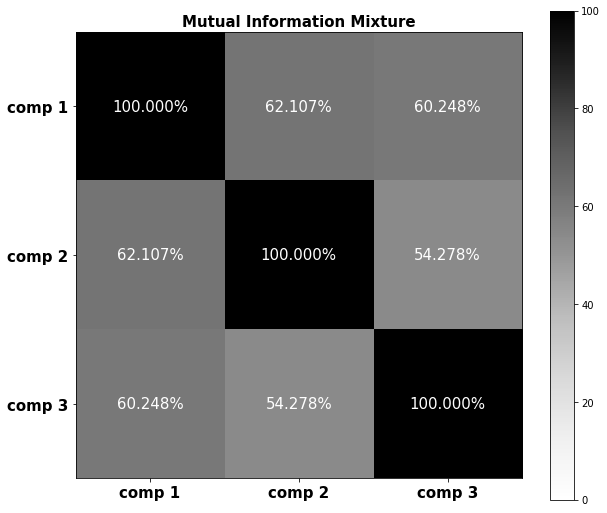

In [36]:
StatisticalAnalysis.plot_mutual_info(MI_x,title='Mixture',output=save_images,name='run9_mix_MI_100k',save=True)

In [37]:
MI_s = StatisticalAnalysis.create_mutual_info_matrix(sources,sources)
MI_s

array([[ 1.        ,  0.00754774,  0.32327581],
       [ 0.00754774,  1.        ,  0.00216894],
       [ 0.32327581,  0.00216894,  1.        ]])

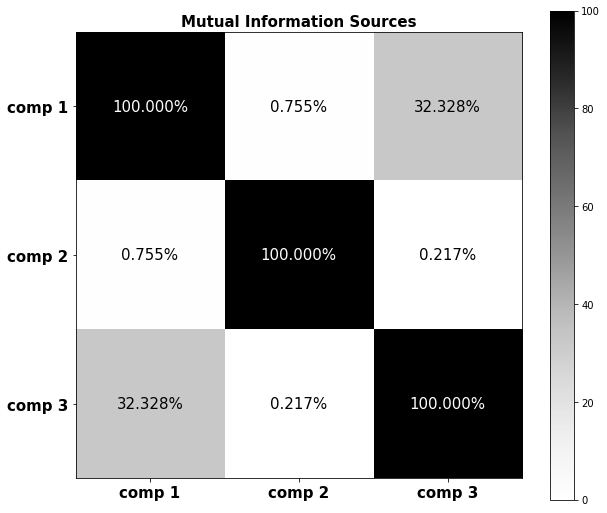

In [38]:
StatisticalAnalysis.plot_mutual_info(MI_s,title='Sources',output=save_images,name='run9_sources_MI_100k',save=True)

In [39]:
# Make FastICA and counting time and interations
init_time = time.time()
ica = FastICA(algorithm='parallel',whiten=True,fun='logcosh',max_iter=10000)
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
recovered_sources = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)
numero_interacao = fit.n_iter_
convergence_time = round(current_time-init_time,3)

number of interations: 4
Time to converges the FastICA: 0.196 seconds


In [40]:
MI_reco = StatisticalAnalysis.create_mutual_info_matrix(recovered_sources,recovered_sources)
MI_reco

array([[ 1.        ,  0.34509163,  0.08745699],
       [ 0.34509163,  1.        ,  0.19611214],
       [ 0.08745699,  0.19611214,  1.        ]])

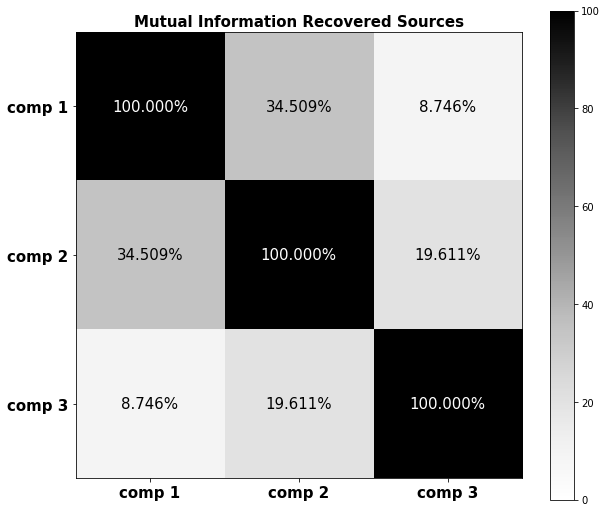

In [41]:
StatisticalAnalysis.plot_mutual_info(MI_reco,title='Recovered Sources',output=save_images,
                                     name='run9_reco_MI_100k',save=True)

In [42]:
MI_sreco = StatisticalAnalysis.create_mutual_info_matrix(sources,recovered_sources)
MI_sreco

array([[ 0.3370417 ,  0.63881589,  0.16636509],
       [ 0.00565476,  0.02250922,  0.7620131 ],
       [ 0.62080256,  0.33597597,  0.08782214]])

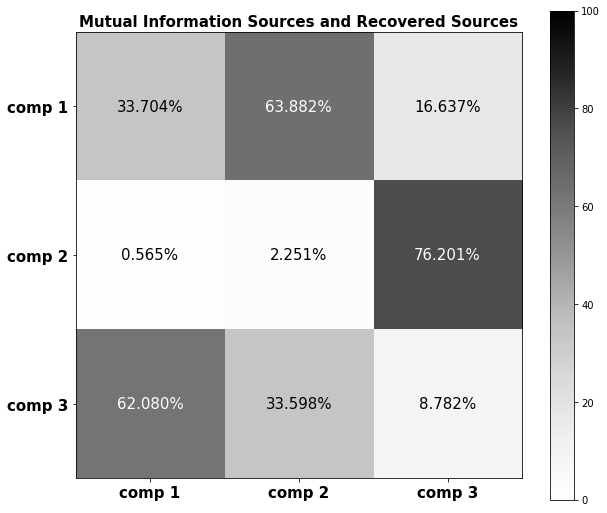

In [43]:
StatisticalAnalysis.plot_mutual_info(MI_sreco,title='Sources and Recovered Sources',output=save_images,
                                     name='run9_sourcesreco_MI_100k',save=True)

In [44]:
ordened_recovered_sources = np.zeros_like(recovered_sources)
ordened_recovered_sources[0,:] = recovered_sources[1,:]
ordened_recovered_sources[1,:] = recovered_sources[2,:]
ordened_recovered_sources[2,:] = recovered_sources[0,:]

Ordened_MI = StatisticalAnalysis.create_mutual_info_matrix(sources,ordened_recovered_sources)
Ordened_MI

array([[ 0.63881589,  0.16636509,  0.3370417 ],
       [ 0.02250922,  0.7620131 ,  0.00565476],
       [ 0.33597597,  0.08782214,  0.62080256]])

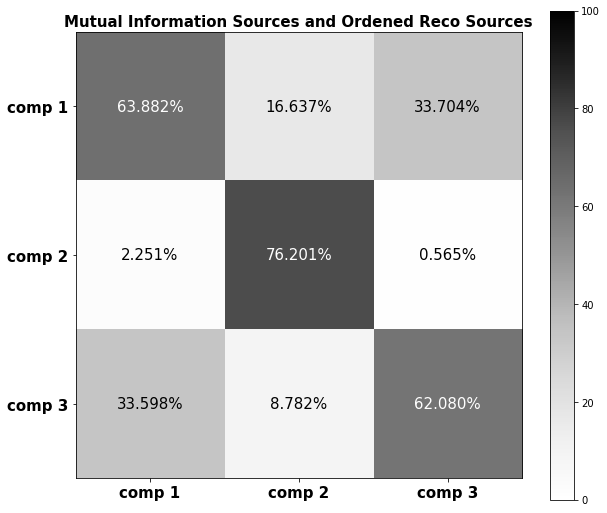

In [45]:
StatisticalAnalysis.plot_mutual_info(Ordened_MI,title='Sources and Ordened Reco Sources',output=save_images,
                                     name='run9_sourcesreco_ordened_MI_100k',save=True)

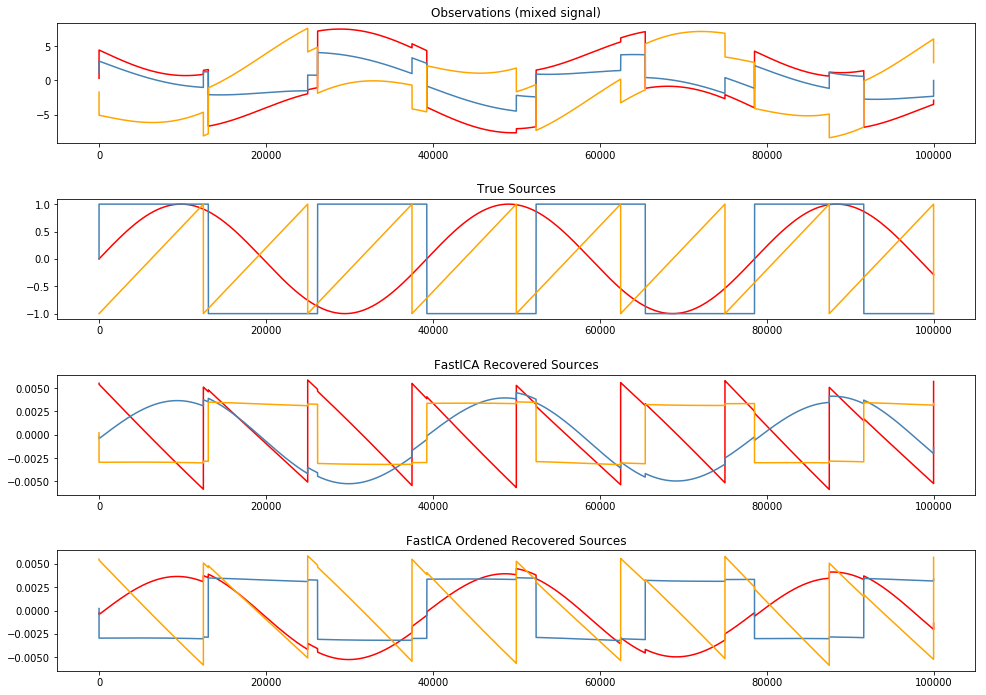

In [46]:
fig, ax = plt.subplots(1,figsize=(15,10))

models = [x,sources,recovered_sources,ordened_recovered_sources]#, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
        'FastICA Recovered Sources',
        'FastICA Ordened Recovered Sources']
         #
         #'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model, colors):
        plt.plot(sig, color=color)

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.savefig(save_images+'/'+'run9_time_series_100k.pdf')
plt.show()

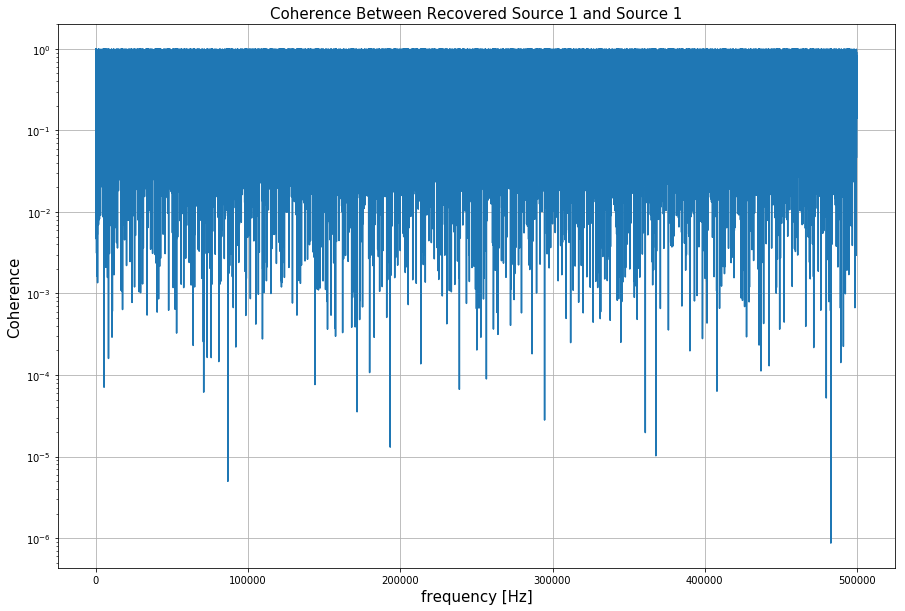

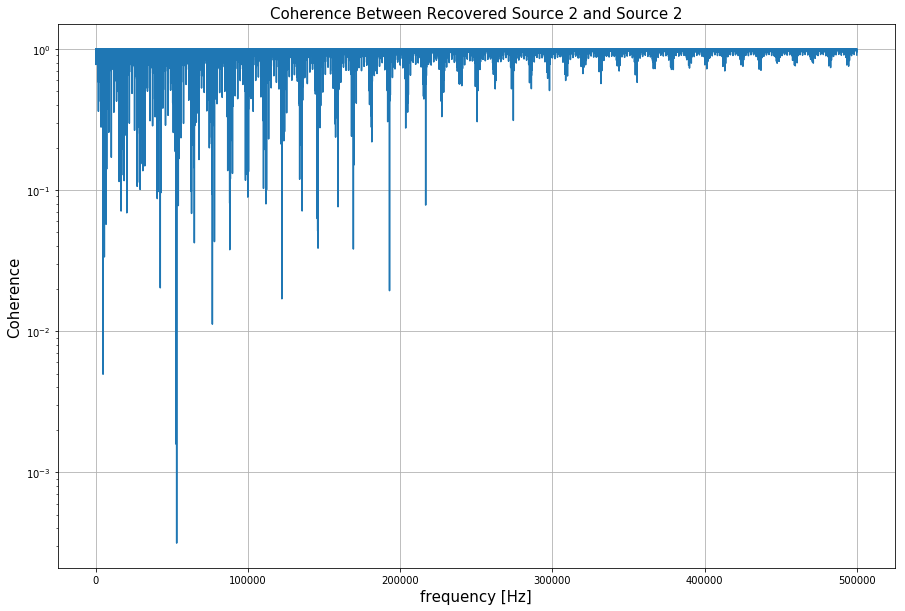

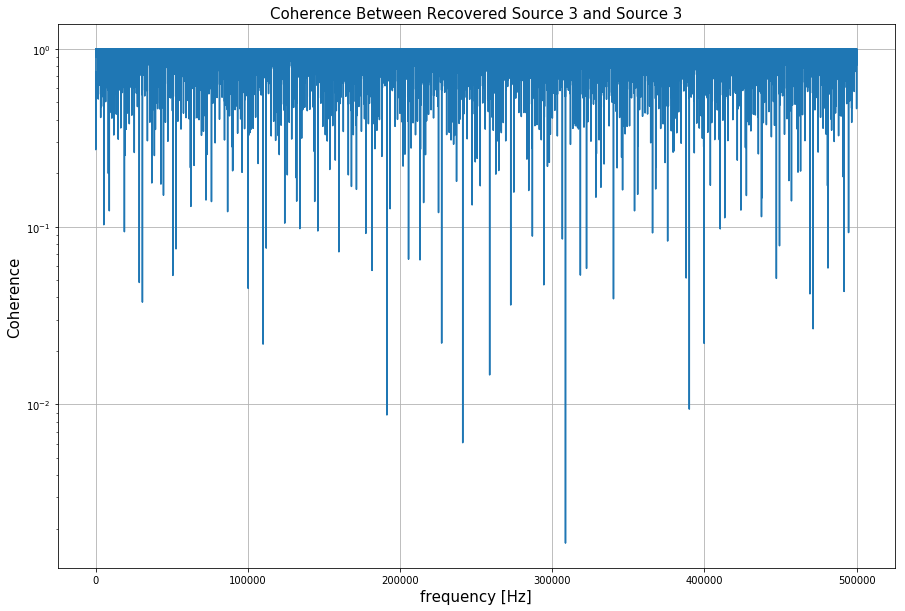

In [48]:
fs = 10e5
for i in range(ordened_recovered_sources.shape[0]):
    fig, ax = plt.subplots(1,figsize=(15,10))
    f, Cxy = signal.coherence(ordened_recovered_sources[i,:], sources[i,:],fs,nperseg=65536)
    plt.semilogy(f, Cxy)
    plt.title('Coherence Between Recovered Source '+str(i+1)+' and Source '+str(i+1),fontsize =15)
    plt.xlabel('frequency [Hz]',fontsize =15)
    plt.ylabel('Coherence',fontsize =15)
    #plt.yticks(arange(min(Cxy)))
    plt.grid()
    plt.savefig(save_images+'/'+'run9_time_series_100k_coherence'+str(i+1)+'.pdf')
    plt.show()

In [52]:
KL_div= StatisticalAnalysis.CreateKLsMatrix(sources,ordened_recovered_sources)
SKL_div = StatisticalAnalysis.SKLDiv(KL_div[0],KL_div[1])
JS_div = StatisticalAnalysis.JSDiv(sources,ordened_recovered_sources)

In [53]:
SKL_div,JS_div

(array([[ 0.02112943,  0.74919892,  0.90594129,  0.88853028],
        [ 0.39496858,  0.01826514,  0.44385056,  1.42956849],
        [ 0.68221989,  0.32046091,  0.52025244,  1.55551931],
        [ 0.5109706 ,  1.53327691,  1.28511742,  0.02110724]]),
 array([[ 0.00993877,  0.20532984,  0.35582146,  0.26717788],
        [ 0.37175924,  0.00962699,  0.17605768,  0.78647958],
        [ 0.45092991,  0.18447249,  0.26001183,  0.5199777 ],
        [ 0.43550072,  0.7183882 ,  0.70442867,  0.01029121]]))

In [54]:
import pandas as pd

JS = pd.DataFrame(JS_div)
SKL = pd.DataFrame(SKL_div)
print JS.to_latex(),SKL.to_latex()

\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.009939 &  0.205330 &  0.355821 &  0.267178 \\
1 &  0.371759 &  0.009627 &  0.176058 &  0.786480 \\
2 &  0.450930 &  0.184472 &  0.260012 &  0.519978 \\
3 &  0.435501 &  0.718388 &  0.704429 &  0.010291 \\
\bottomrule
\end{tabular}
\begin{tabular}{lrrrr}
\toprule
{} &         0 &         1 &         2 &         3 \\
\midrule
0 &  0.021129 &  0.749199 &  0.905941 &  0.888530 \\
1 &  0.394969 &  0.018265 &  0.443851 &  1.429568 \\
2 &  0.682220 &  0.320461 &  0.520252 &  1.555519 \\
3 &  0.510971 &  1.533277 &  1.285117 &  0.021107 \\
\bottomrule
\end{tabular}



In [49]:
information_algorithm_matrix[0,2] = numero_interacao
information_algorithm_matrix[1,2] = convergence_time
information_algorithm_matrix[2,2] = amari.amariError(matrix_A,fit.mixing_)
information_algorithm_matrix[3,2] = amari.amariError(matrix_A,fit.mixing_,squares=True)
information_algorithm_matrix[4,2] = mean_squared_error(sources,recovered_sources)
information_algorithm_matrix

array([[ 3.        ,  5.        ,  4.        ],
       [ 0.005     ,  0.009     ,  0.196     ],
       [ 4.97880639,  2.62405217,  4.9002546 ],
       [ 3.18786783,  1.1393265 ,  2.36997612],
       [ 0.76646895,  0.58960387,  0.60822604]])

In [50]:
import pandas as pd

info_run1 = pd.DataFrame(information_algorithm_matrix)
print info_run1.to_latex()

\begin{tabular}{lrrr}
\toprule
{} &         0 &         1 &         2 \\
\midrule
0 &  3.000000 &  5.000000 &  4.000000 \\
1 &  0.005000 &  0.009000 &  0.196000 \\
2 &  4.978806 &  2.624052 &  4.900255 \\
3 &  3.187868 &  1.139326 &  2.369976 \\
4 &  0.766469 &  0.589604 &  0.608226 \\
\bottomrule
\end{tabular}

